In [1]:
import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")

### Problem Statement

### Data Gathering

In [2]:
boston=load_boston()
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df["price"]=boston.target
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

<AxesSubplot:>

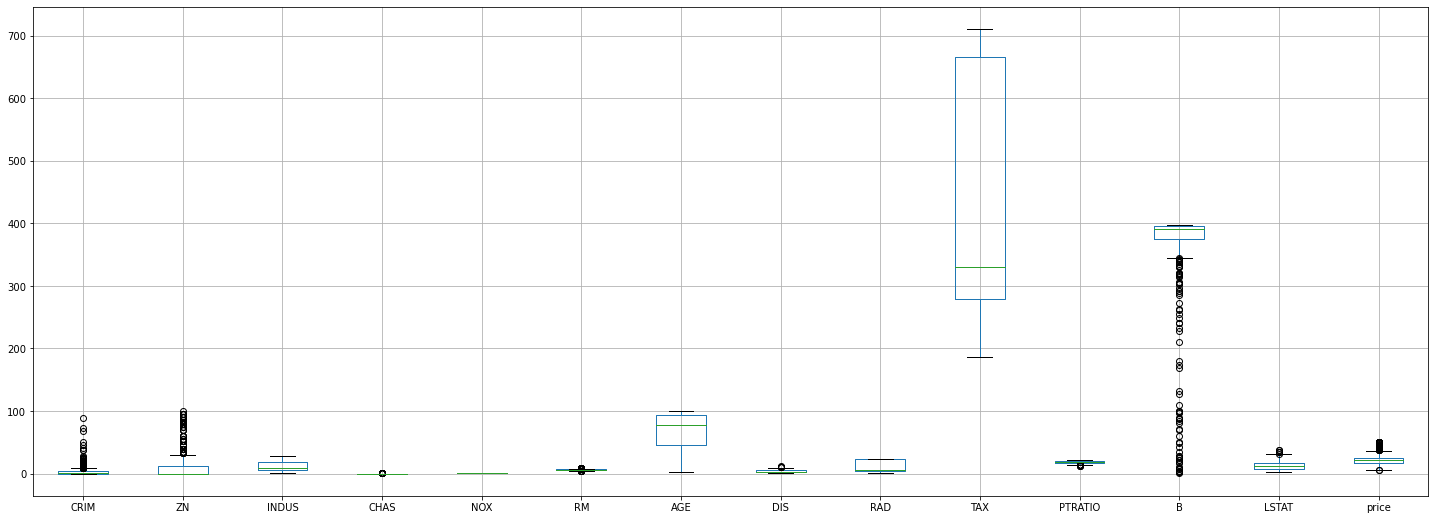

In [5]:
plt.figure(figsize=(25,9))
df.boxplot()

### Feature Engineering

##### CRIM

<AxesSubplot:>

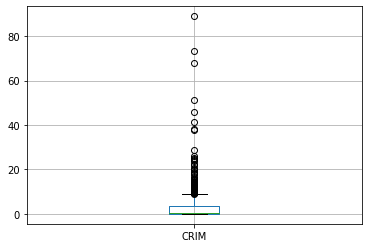

In [6]:
df[["CRIM"]].boxplot()       # Need to handle outliers(handling by IQR method)

In [7]:
Q1=df["CRIM"].quantile(0.25)
Q3=df["CRIM"].quantile(0.75)
IQR=Q3-Q1
uppertail = Q3+1.5*IQR
lowertail = Q1-1.5*IQR

outlier_df = df[(df["CRIM"]>uppertail) | (df["CRIM"]<lowertail)]
outlier_df.shape

(66, 14)

In [8]:
fare_mean = df.loc[((df["CRIM"]<=uppertail) & (df["CRIM"]>=lowertail)),"CRIM"].mean()
fare_mean

1.1983409999999992

In [9]:
df.loc[(df["CRIM"]>uppertail) | (df["CRIM"]<lowertail),"CRIM"]=fare_mean

##### ZN

In [10]:
df["ZN"].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [11]:
Q1=df["ZN"].quantile(0.25)
Q3=df["ZN"].quantile(0.75)
IQR=Q3-Q1
uppertail = Q3+1.5*IQR
lowertail = Q1-1.5*IQR

outlier_df = df[(df["ZN"]>uppertail) | (df["ZN"]<lowertail)]
outlier_df.shape

(68, 14)

In [12]:
fare_mean=df.loc[(df["ZN"]<=uppertail) & (df["ZN"]>=lowertail),"ZN"].mean()
fare_mean

3.192922374429224

In [13]:
df.loc[(df["ZN"]>uppertail) | (df["ZN"]<lowertail)]=fare_mean

<AxesSubplot:>

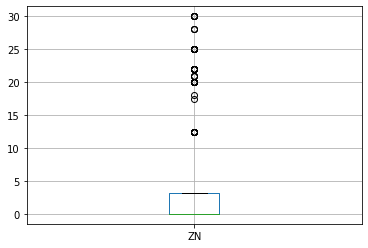

In [14]:
df[["ZN"]].boxplot()

##### B

<AxesSubplot:>

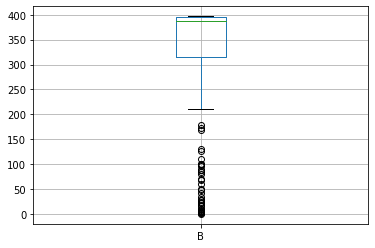

In [15]:
df[["B"]].boxplot()

In [16]:
Q1=df["B"].quantile(0.25)
Q3=df["B"].quantile(0.75)
IQR=Q3-Q1
uppertail = Q3+1.5*IQR
lowertail = Q1-1.5*IQR

outlier_df = df[(df["B"]<lowertail)]
outlier_df.shape

(107, 14)

In [17]:
fare_mean = df.loc[(df["B"]>=lowertail),"B"].mean()
fare_mean

380.11303258145284

In [18]:
# df.loc[(df["B"]>uppertail) | (df["B"]<lowertail),"B"]=fare_mean
df["B"]=np.where((df["B"]<lowertail),fare_mean,df["B"])

##### LSTAT

<AxesSubplot:>

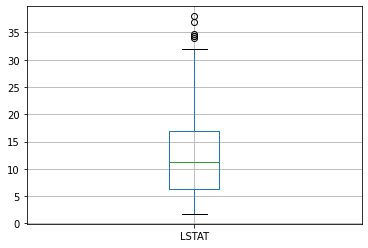

In [19]:
df[["LSTAT"]].boxplot()

### Feature selection

### Model selection and model training

In [20]:
x=df.drop("price",axis=1)
y=df["price"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [22]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(x_train,y_train)

KNeighborsRegressor()

### Evaluation

In [23]:
# training

yp_train=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,yp_train)
mae=mean_absolute_error(y_train,yp_train)
r2=r2_score(y_train,yp_train)

print(f"{mse=}\n{mae=}\n{r2=}")
print("~"*25)

# testing

yp_test=knn_reg.predict(x_test)
mse=mean_squared_error(y_test,yp_test)
mae=mean_absolute_error(y_test,yp_test)
r2=r2_score(y_test,yp_test)

print(f"{mse=}\n{mae=}\n{r2=}")

mse=22.01446831683168
mae=2.9020297029702973
r2=0.8046572332083808
~~~~~~~~~~~~~~~~~~~~~~~~~
mse=31.332588235294114
mae=3.571764705882353
r2=0.6353394549893087


##### hyper parameter tuning

Text(0.5, 1.0, 'plot of k and r2')

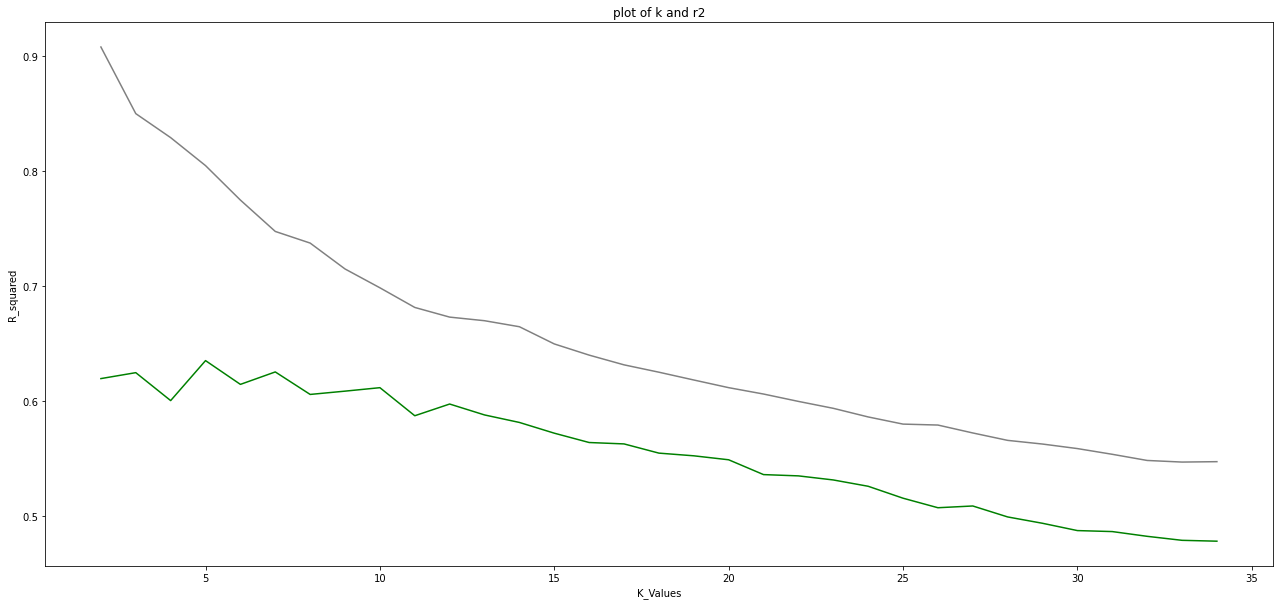

In [24]:
r2_testlist=[]
r2_trainlist=[]
k_values=np.arange(2,35)
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(x_train,y_train)
#     training
    r2train=knn_reg.score(x_train,y_train)
    r2_trainlist.append(r2train)
#     testing
    r2test=knn_reg.score(x_test,y_test)
    r2_testlist.append(r2test)
plt.figure(figsize=(22,10))
plt.plot(k_values,r2_testlist,color="Green")
plt.plot(k_values,r2_trainlist,color="Grey")
plt.xlabel("K_Values")
plt.ylabel("R_squared")
plt.title("plot of k and r2")

Text(0.5, 1.0, 'plot of k and r2')

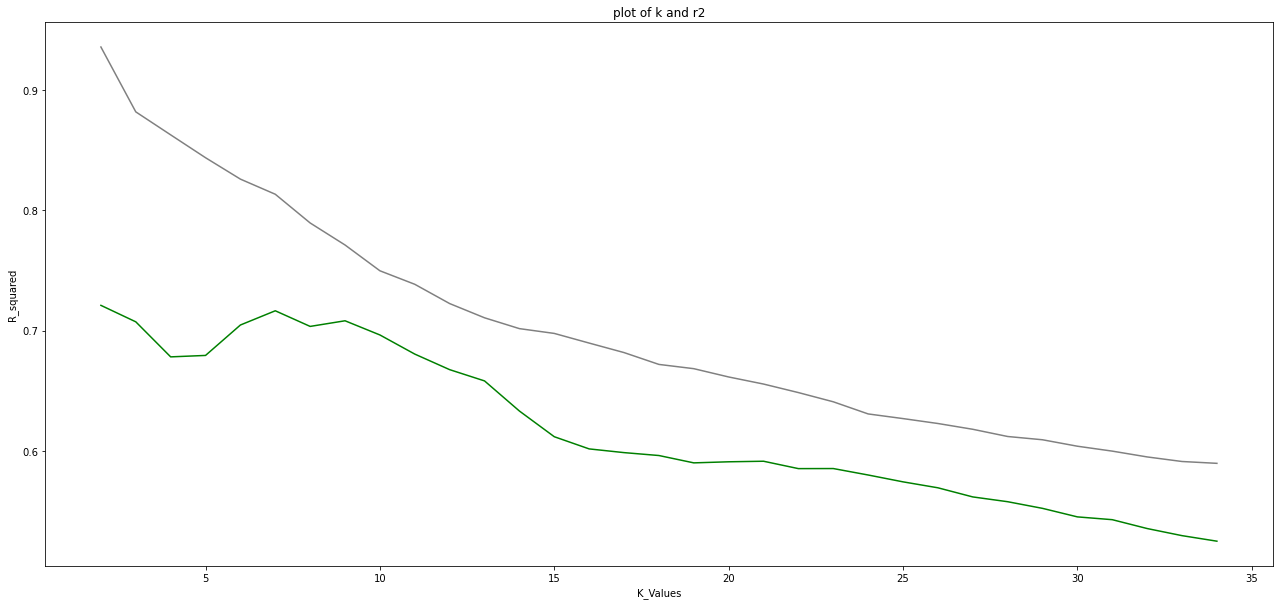

In [25]:
r2_testlist=[]
r2_trainlist=[]
k_values=np.arange(2,35)
for k in k_values:
    knn_reg=KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(x_train,y_train)
#     training
    r2train=knn_reg.score(x_train,y_train)
    r2_trainlist.append(r2train)
#     testing
    r2test=knn_reg.score(x_test,y_test)
    r2_testlist.append(r2test)
plt.figure(figsize=(22,10))
plt.plot(k_values,r2_testlist,color="Green")
plt.plot(k_values,r2_trainlist,color="Grey")
plt.xlabel("K_Values")
plt.ylabel("R_squared")
plt.title("plot of k and r2")

##### Gridsearchcv

In [26]:
knn_reg=KNeighborsRegressor()
hyperparameter={"n_neighbors":np.arange(2,35),"p":[1,2]}
gscv_knn_reg=GridSearchCV(knn_reg,hyperparameter,cv=5)
gscv_knn_reg.fit(x_train,y_train)
gscv_knn_reg.best_estimator_

KNeighborsRegressor(n_neighbors=3, p=1)

In [27]:
knn_reg=KNeighborsRegressor(n_neighbors=3, p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3, p=1)

In [28]:
# training

yp_train=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,yp_train)
mae=mean_absolute_error(y_train,yp_train)
r2=r2_score(y_train,yp_train)

print(f"{mse=}\n{mae=}\n{r2=}")
print("~"*25)

# testing

yp_test=knn_reg.predict(x_test)
mse=mean_squared_error(y_test,yp_test)
mae=mean_absolute_error(y_test,yp_test)
r2=r2_score(y_test,yp_test)

print(f"{mse=}\n{mae=}\n{r2=}")

mse=13.335665566556656
mae=2.1419141914191417
r2=0.8816675573860138
~~~~~~~~~~~~~~~~~~~~~~~~~
mse=25.153344226579506
mae=3.219281045751634
r2=0.7072558402891893


##### randomizedsearchcv

In [29]:
knn_reg=KNeighborsRegressor()
hyperparameter={"n_neighbors":np.arange(2,35),"p":[1,2]}
racv_knn_reg=RandomizedSearchCV(knn_reg,hyperparameter,cv=5)
racv_knn_reg.fit(x_train,y_train)
racv_knn_reg.best_estimator_

KNeighborsRegressor(n_neighbors=3, p=1)

In [30]:
knn_reg=KNeighborsRegressor(n_neighbors=2, p=1)
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [31]:
# training

yp_train=knn_reg.predict(x_train)
mse=mean_squared_error(y_train,yp_train)
mae=mean_absolute_error(y_train,yp_train)
r2=r2_score(y_train,yp_train)

print(f"{mse=}\n{mae=}\n{r2=}")
print("~"*25)

# testing

yp_test=knn_reg.predict(x_test)
mse=mean_squared_error(y_test,yp_test)
mae=mean_absolute_error(y_test,yp_test)
r2=r2_score(y_test,yp_test)

print(f"{mse=}\n{mae=}\n{r2=}")

mse=7.264226485148516
mae=1.5709158415841586
r2=0.9355417500987326
~~~~~~~~~~~~~~~~~~~~~~~~~
mse=23.978112745098034
mae=3.2397058823529417
r2=0.7209336299863713


##### standardization

In [32]:
std=StandardScaler()
array=std.fit_transform(x_train)
array1= std.fit_transform(x_test)
std_x_test = pd.DataFrame(array1,columns=x_test.columns)
std_x_train=pd.DataFrame(array,columns=x_train.columns)

In [33]:
knn_reg=KNeighborsRegressor(n_neighbors=2,p=1)
knn_reg.fit(std_x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [34]:
# training

yp_train=knn_reg.predict(std_x_train)
mse=mean_squared_error(y_train,yp_train)
mae=mean_absolute_error(y_train,yp_train)
r2=r2_score(y_train,yp_train)

print(f"{mse=}\n{mae=}\n{r2=}")
print("~"*25)

# testing

yp_test=knn_reg.predict(std_x_test)
mse=mean_squared_error(y_test,yp_test)
mae=mean_absolute_error(y_test,yp_test)
r2=r2_score(y_test,yp_test)

print(f"{mse=}\n{mae=}\n{r2=}")

mse=5.756280940594061
mae=1.3451732673267327
r2=0.9489223255732329
~~~~~~~~~~~~~~~~~~~~~~~~~
mse=21.34598039215686
mae=2.746078431372548
r2=0.7515673845666142


### API

In [35]:
project_Data={"columns":list(x.columns)}

In [36]:
a=CRIM=2
b=ZN=2
c=INDUS=2
d=CHAS=2
e=NOX=2
f=RM=2
g=AGE=2
h=DIS=2
i=RAD=2
j=TAX=2
k=PTRATIO=2
l=B=2
m=LSTAT=2

#price=?

In [37]:
test_array=np.zeros(13)
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [38]:
test_array[0]=a
test_array[1]=b
test_array[2]=c
test_array[3]=d
test_array[4]=e
test_array[5]=f
test_array[6]=g
test_array[7]=h
test_array[8]=i
test_array[9]=j
test_array[10]=k
test_array[11]=l
test_array[12]=m

In [39]:
test_array

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [40]:
price=knn_reg.predict([test_array])
price

array([14.6])

In [42]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
456,4.668830,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,380.113033,19.01
118,0.130580,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.630000,15.37
477,1.198341,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24.0,666.0,20.2,349.480000,24.91
76,0.101530,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.660000,11.97
104,0.139600,0.0,8.56,0.0,0.520,6.167,90.0,2.4210,5.0,384.0,20.9,392.690000,12.33


In [76]:
with open ("standardizer.pkl","wb") as file:
    pickle.dump(std,file)

In [77]:
with open ("knnmodel.pkl","wb") as file:
    pickle.dump(knn_reg,file)

In [78]:
with open("featuredata.json","w") as file:
    json.dump(project_Data,file)

### Deployment